In [2]:
import pandas as pd
import datetime
from joblib import Parallel, delayed
import multiprocessing
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import jqdatasdk as jq

In [18]:
jq.auth('13918852005','960312Lsc')

In [11]:
hs300 = jq.get_price('000300.XSHG', start_date='2005-01-01', end_date='2019-06-30', frequency='daily', fields=None, skip_paused=False, fq='pre', count=None)

In [14]:
hs300_sub = hs300.dropna()[['close','volume']]

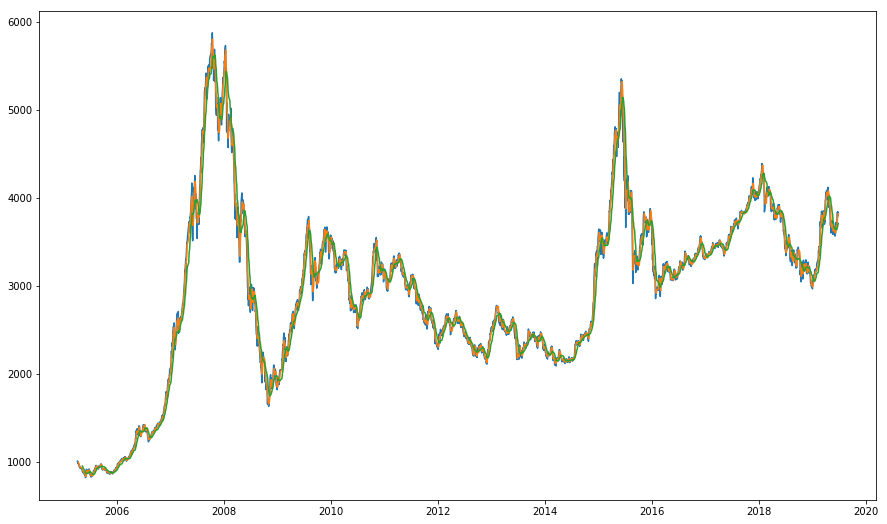

In [22]:
plt.figure(figsize=(15,9))
plt.plot(hs300_sub['close'])
plt.plot(hs300_sub['close'].rolling(5).mean())
plt.plot(hs300_sub['close'].rolling(20).mean())
plt.show()

In [33]:
hs300_sub['ma5'] = hs300_sub['close'].rolling(5).mean()
hs300_sub['ma20'] = hs300_sub['close'].rolling(20).mean()
hs300_sub['dif_5_20'] = hs300_sub['ma5'] - hs300_sub['ma20']
hs300_sub['cross_5_20'] = (hs300_sub['dif_5_20']*(hs300_sub['dif_5_20'].shift(1))).apply(lambda x: 1 if x<=0 else 0)

In [72]:
# 均线总相交次数
tol_cross_time = hs300_sub['cross_5_20'].sum()

In [77]:
cross_day_list = hs300_sub[hs300_sub['cross_5_20']==1].index.tolist()
last_time = 0
for cnt in range(len(cross_day_list)):
    day = cross_day_list[cnt]
    if cnt == 0:
        continue
    last_time += (day - cross_day_list[cnt-1]).days

In [78]:
# 相交处平均出现间隔天数
last_time/(tol_cross_time-1)

27.50537634408602